# Dataset

C:\Users\Isaac\AppData\Local\Temp\ipykernel_19428\955990973.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas


121.6867627785059
72.40518417462484
29.153419593345657
155.5482233502538
32.457463672391015
33.240885416666664


C:\Users\Isaac\AppData\Local\Temp\ipykernel_19428\955990973.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe[column_name].replace(0, np.NaN, inplace=True)
C:\Users\Isaac\AppData\Local\Temp\ipykernel_19428\955990973.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



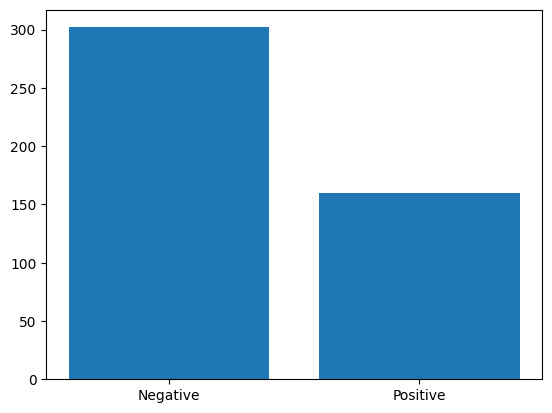

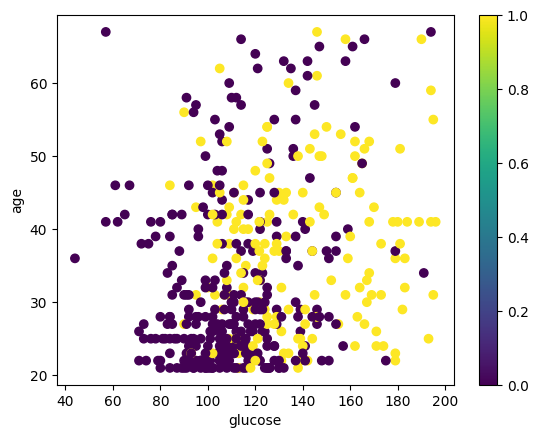

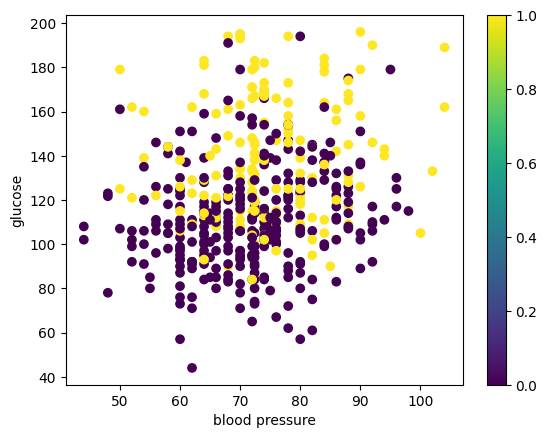

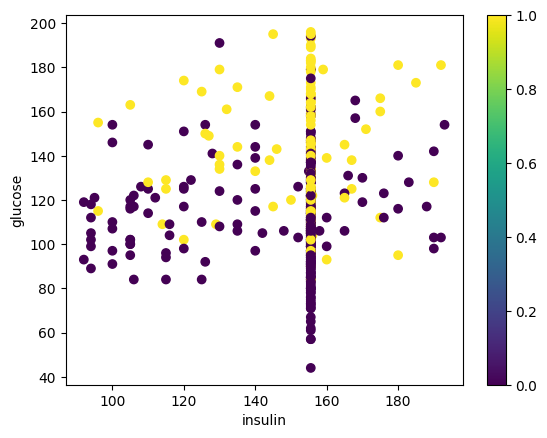

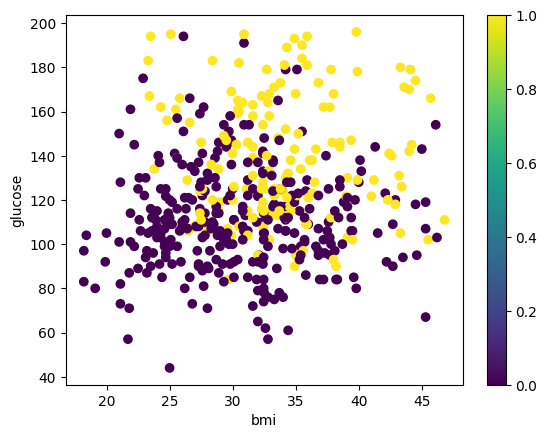

training set data proportion:  1.8828125
testing set data proportion:  1.90625


In [1]:
## Imports
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score,  roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset

## Data loading
dataframe = pandas.read_csv("data/diabetes.csv")
## Data analysis
### Outliers and invalid values
def interquartile_range(variable, dataframe):
    Q1 = dataframe[variable].quantile(0.25)
    Q3 = dataframe[variable].quantile(0.75)
    return (Q1, Q3, Q3 - Q1)

def remove_outliers (dataframe):
    threshold = 1.5
    for i in range(len(dataframe.columns)-1):
        Q1 = interquartile_range(dataframe.columns[i], dataframe)[0]
        Q3 = interquartile_range(dataframe.columns[i], dataframe)[1]
        IQR = interquartile_range(dataframe.columns[i], dataframe)[2]
        outliers = dataframe[(dataframe[dataframe.columns[i]] < Q1 - threshold * IQR) | (dataframe[dataframe.columns[i]] > Q3 + threshold * IQR)]
        dataframe = dataframe.drop(outliers.index)
    return dataframe

def remove_zeros_from_column(dataframe, column_name):
    dataframe[column_name].replace(0, np.NaN, inplace=True)
    mean = dataframe[column_name].mean()
    print(mean)
    dataframe[column_name].replace(np.NaN, mean, inplace=True) 

remove_zeros_from_column(dataframe, 'Glucose')
remove_zeros_from_column(dataframe, 'BloodPressure')
remove_zeros_from_column(dataframe, 'SkinThickness')
remove_zeros_from_column(dataframe, 'Insulin')
remove_zeros_from_column(dataframe, 'BMI')
remove_zeros_from_column(dataframe, 'Age')

dataframe = remove_outliers(dataframe) # drop outliers


### Balance evaluation
negative = dataframe.Outcome.value_counts()[0]
positive = dataframe.Outcome.value_counts()[1]

x = np.array(["Negative", "Positive"])
y = np.array([negative,positive])
plt.bar(x,y)
plt.show()
### Pairwise correlation
#### Kendall
dataframe.corr(method='kendall', numeric_only=False)
#### Pearson
dataframe.corr(method='pearson', min_periods=1, numeric_only=False)
#### Spearman
dataframe.corr(method='spearman', min_periods=1, numeric_only=False)
# Data Visualization
blood_pressure = dataframe.BloodPressure
age = dataframe.Age
glucose = dataframe.Glucose
outcome = dataframe.Outcome
bmi = dataframe.BMI
insulin = dataframe.Insulin

scatter_plot = plt.scatter(glucose, age, c=outcome)
plt.colorbar(scatter_plot)
plt.xlabel("glucose")
plt.ylabel("age")
plt.show()

scatter_plot2 = plt.scatter(blood_pressure, glucose, c=outcome)
plt.colorbar(scatter_plot2)
plt.xlabel("blood pressure")
plt.ylabel("glucose")
plt.show()

scatter_plot3 = plt.scatter(insulin, glucose, c=outcome)
plt.colorbar(scatter_plot3)
plt.xlabel("insulin")
plt.ylabel("glucose")
plt.show()

scatter_plot4 = plt.scatter(bmi, glucose, c=outcome)
plt.colorbar(scatter_plot4)
plt.xlabel("bmi")
plt.ylabel("glucose")
plt.show()
## Dataset splitting
X, y = dataframe[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]], dataframe["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=outcome)
print("training set data proportion: ",y_train.value_counts()[0]/y_train.value_counts()[1])
print("testing set data proportion: ",y_test.value_counts()[0]/y_test.value_counts()[1])

# Logistic Regression

Parameters: {'C': 0.01, 'solver': 'liblinear'}
Mean Accuracy: 0.7452425027767493
Accuracy: 0.7419354838709677
Precision: 0.6666666666666666
Recall: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.87      0.82        61
           1       0.67      0.50      0.57        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6844262295081968
Confusion Matrix:
[[53  8]
 [16 16]]


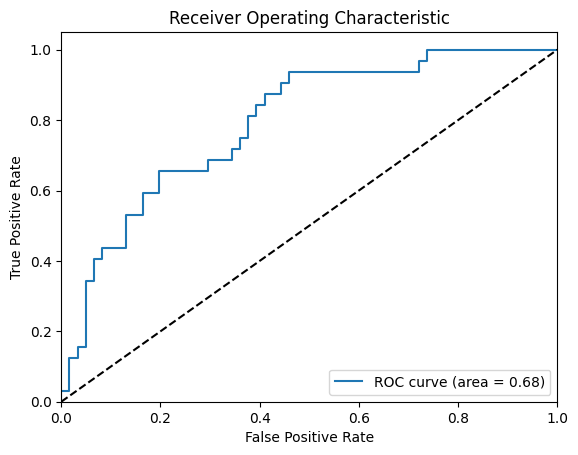

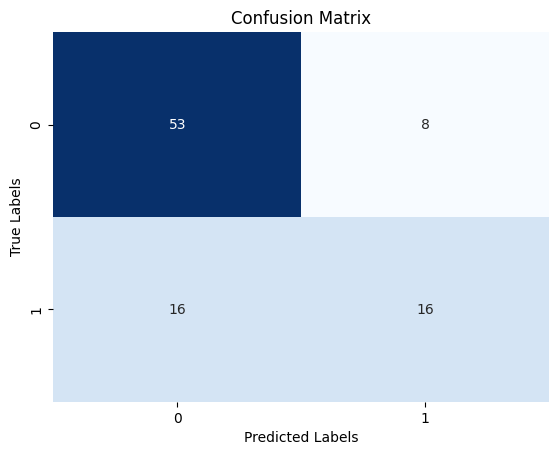

Parameters: {'C': 0.01, 'solver': 'lbfgs'}
Mean Accuracy: 0.7181784524250278
Accuracy: 0.7526881720430108
Precision: 0.7647058823529411
Recall: 0.40625
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        61
           1       0.76      0.41      0.53        32

    accuracy                           0.75        93
   macro avg       0.76      0.67      0.68        93
weighted avg       0.76      0.75      0.73        93

ROC AUC Score: 0.6703381147540983
Confusion Matrix:
[[57  4]
 [19 13]]


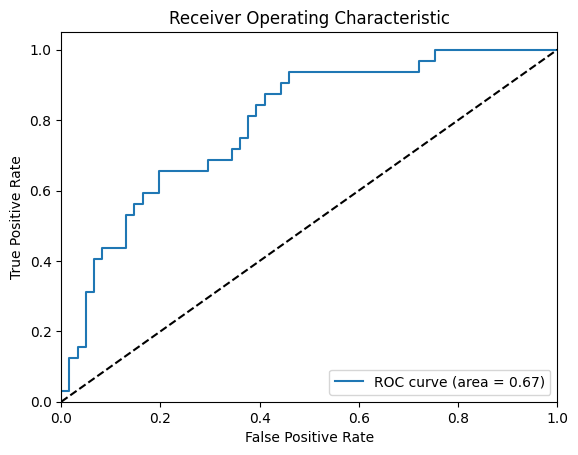

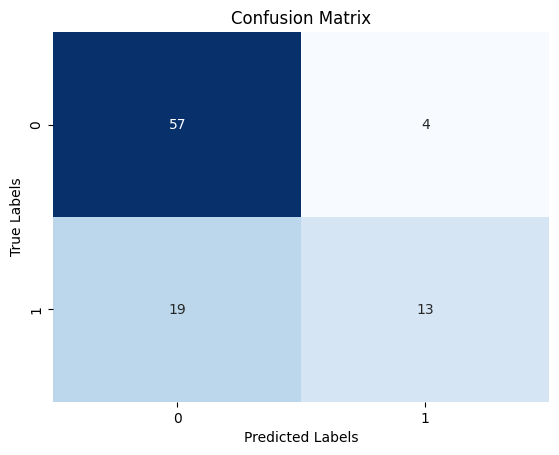

Parameters: {'C': 0.01, 'solver': 'sag'}
Mean Accuracy: 0.7181784524250278
Accuracy: 0.7526881720430108
Precision: 0.7647058823529411
Recall: 0.40625
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        61
           1       0.76      0.41      0.53        32

    accuracy                           0.75        93
   macro avg       0.76      0.67      0.68        93
weighted avg       0.76      0.75      0.73        93

ROC AUC Score: 0.6703381147540983
Confusion Matrix:
[[57  4]
 [19 13]]


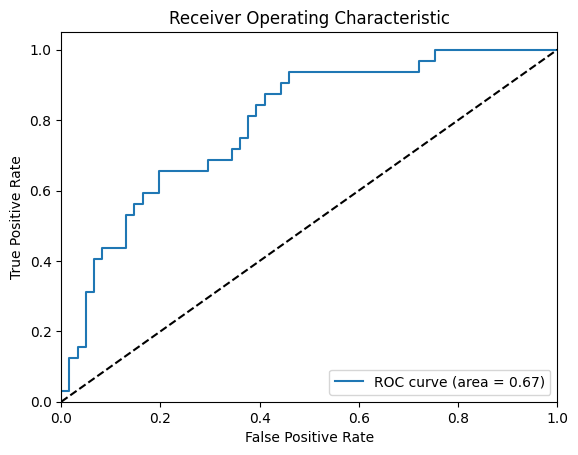

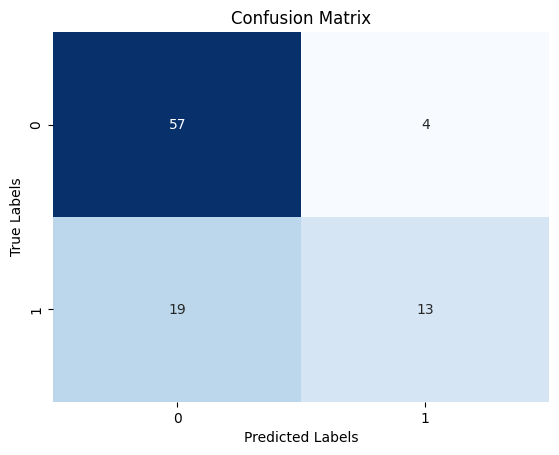

Parameters: {'C': 0.01, 'solver': 'newton-cg'}
Mean Accuracy: 0.7181784524250278
Accuracy: 0.7526881720430108
Precision: 0.7647058823529411
Recall: 0.40625
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        61
           1       0.76      0.41      0.53        32

    accuracy                           0.75        93
   macro avg       0.76      0.67      0.68        93
weighted avg       0.76      0.75      0.73        93

ROC AUC Score: 0.6703381147540983
Confusion Matrix:
[[57  4]
 [19 13]]


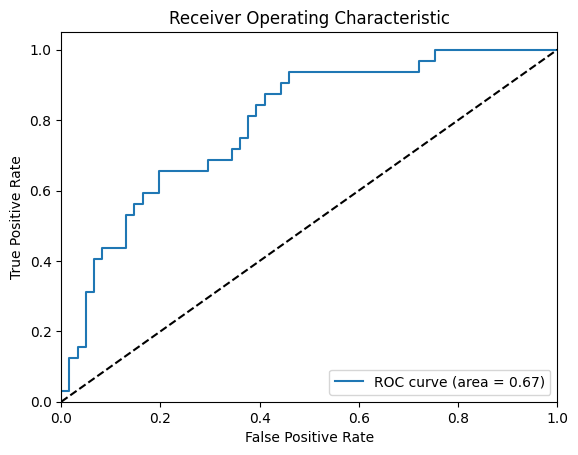

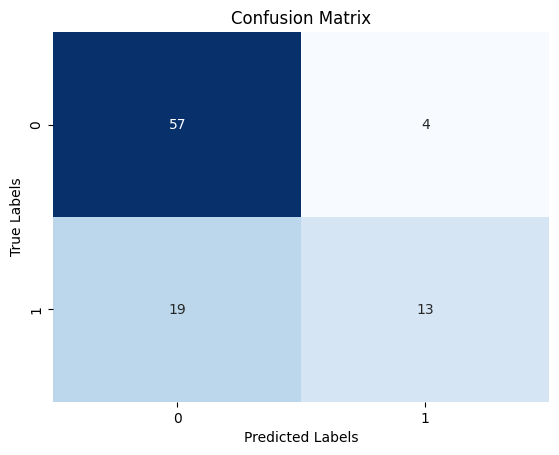

Parameters: {'C': 0.1, 'solver': 'liblinear'}
Mean Accuracy: 0.7425027767493522
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


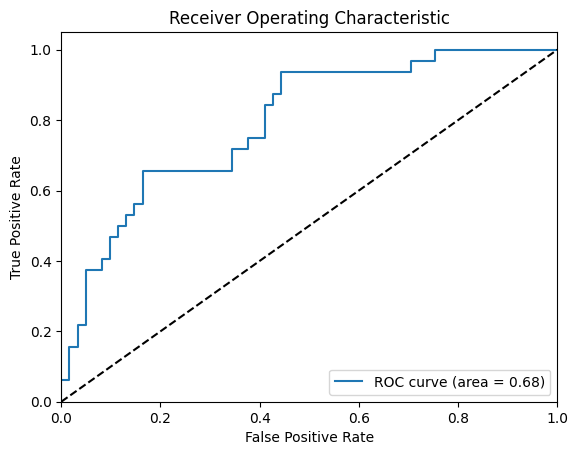

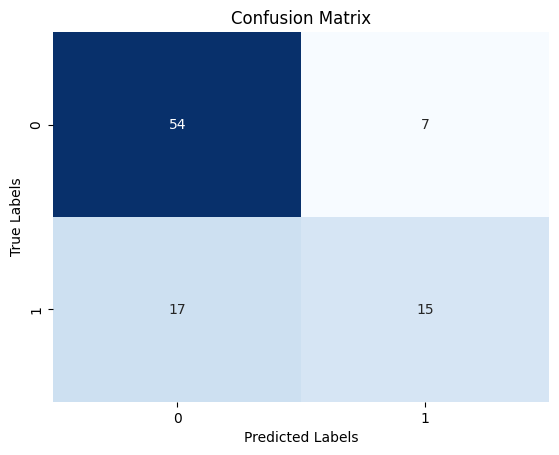

Parameters: {'C': 0.1, 'solver': 'lbfgs'}
Mean Accuracy: 0.7480192521288412
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


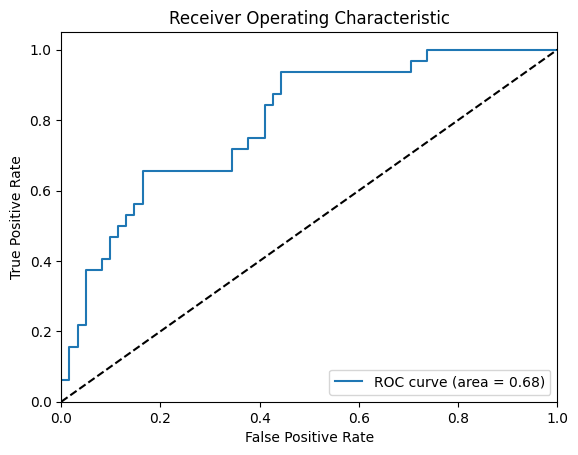

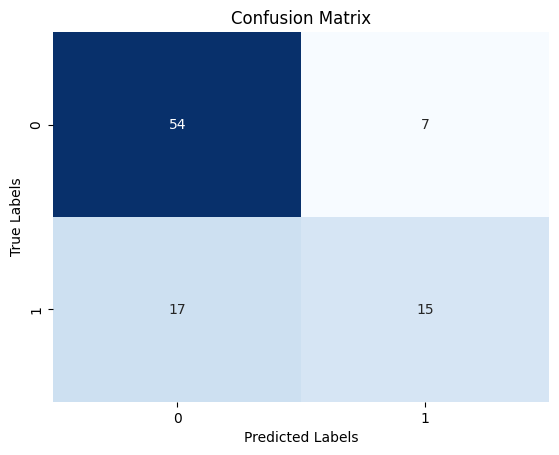

Parameters: {'C': 0.1, 'solver': 'sag'}
Mean Accuracy: 0.7480192521288412
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


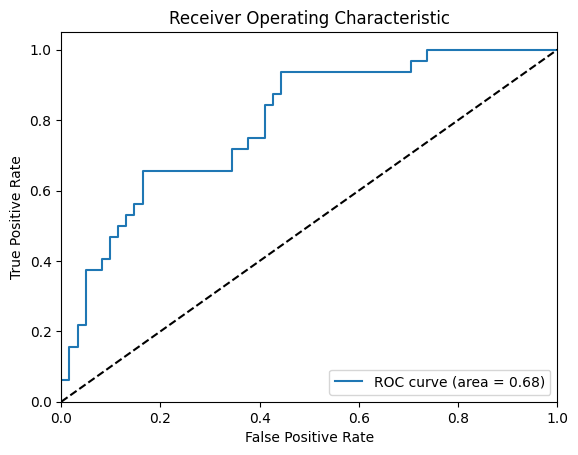

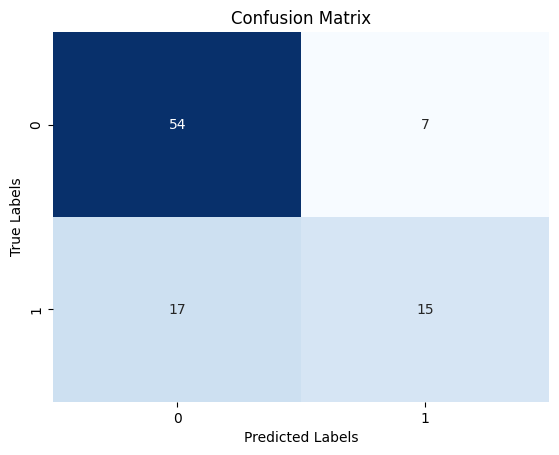

Parameters: {'C': 0.1, 'solver': 'newton-cg'}
Mean Accuracy: 0.7480192521288412
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


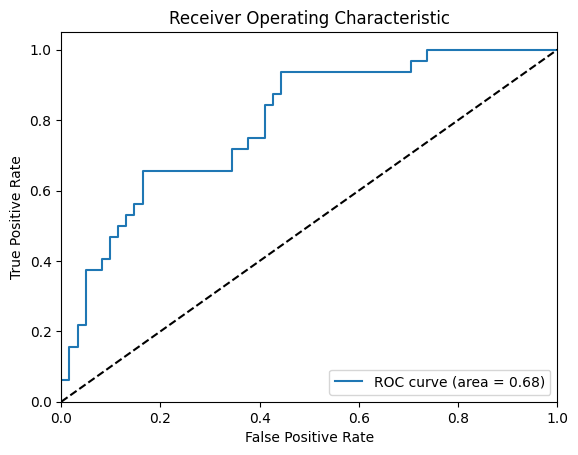

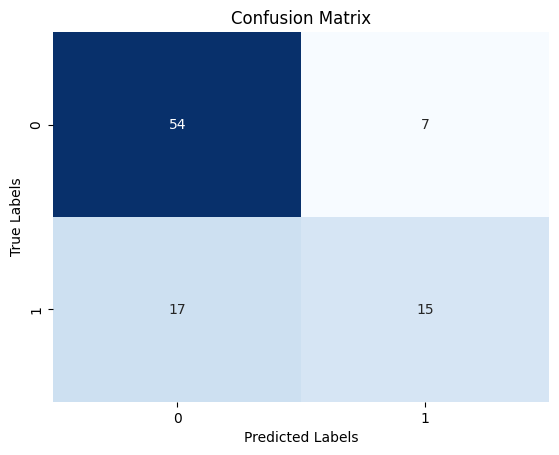

Parameters: {'C': 1, 'solver': 'liblinear'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


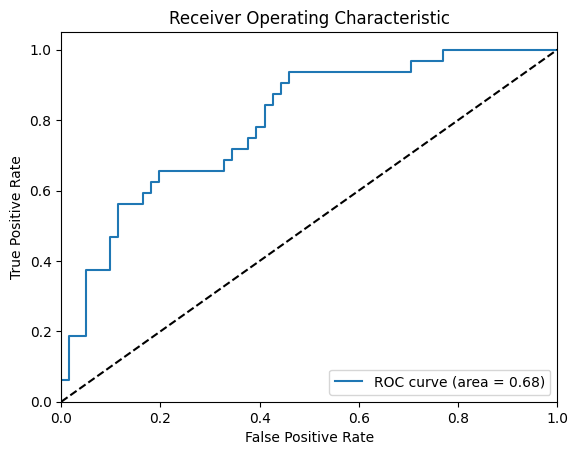

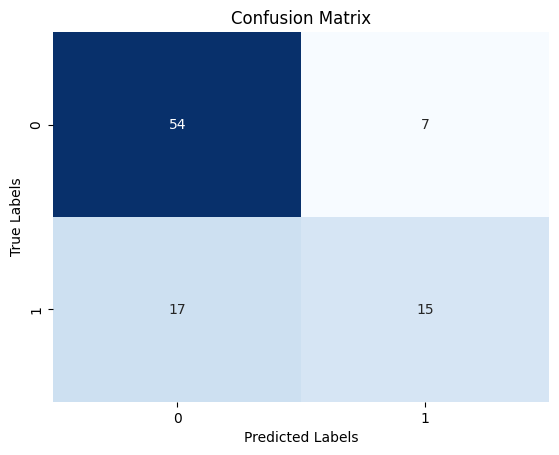

Parameters: {'C': 1, 'solver': 'lbfgs'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


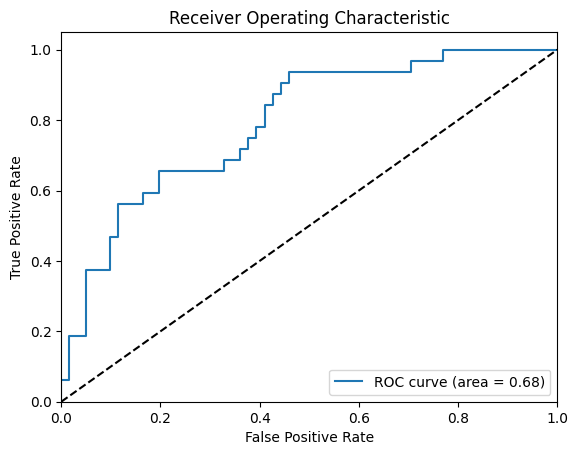

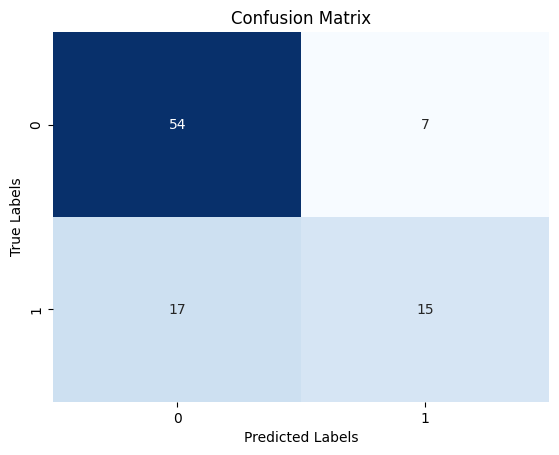

Parameters: {'C': 1, 'solver': 'sag'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


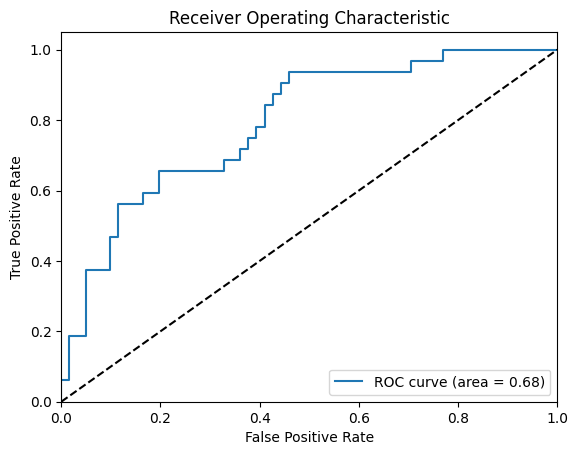

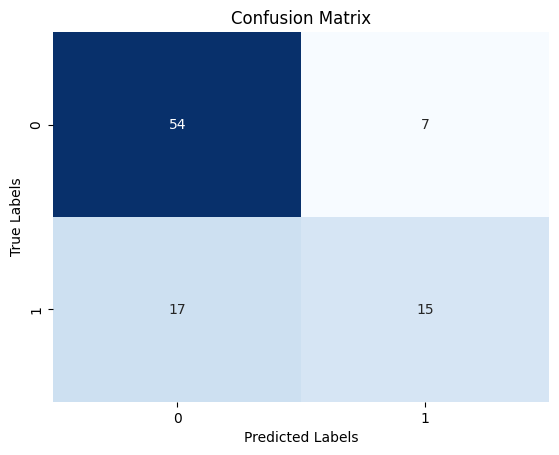

Parameters: {'C': 1, 'solver': 'newton-cg'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


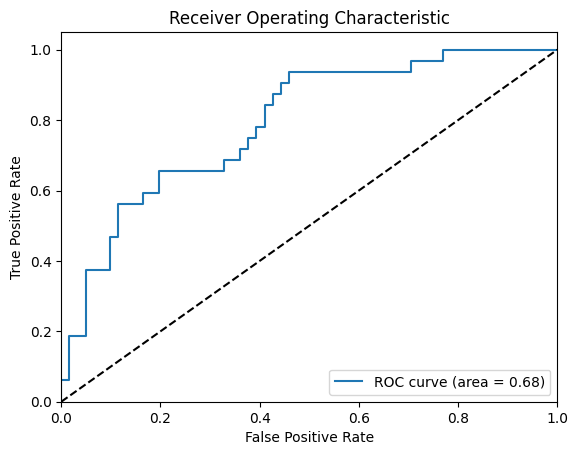

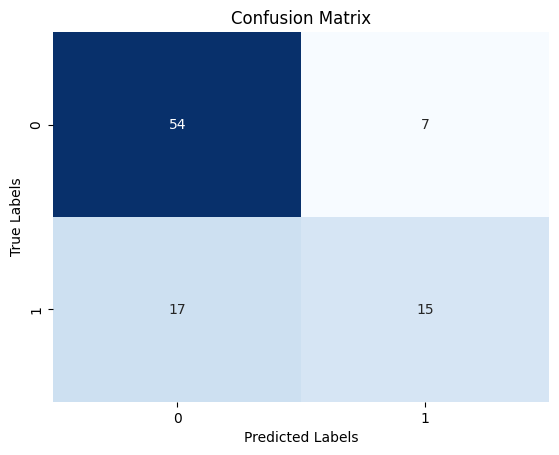

Parameters: {'C': 10, 'solver': 'liblinear'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


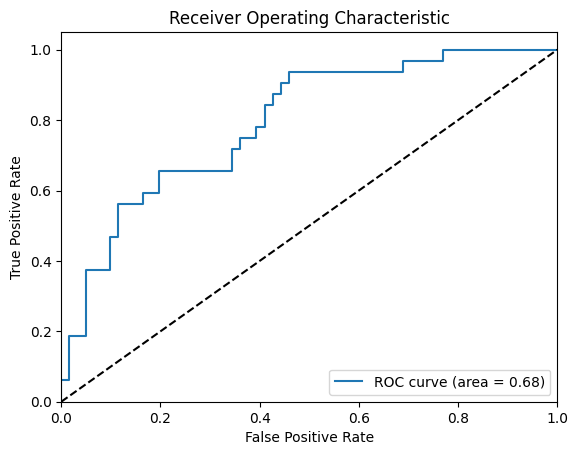

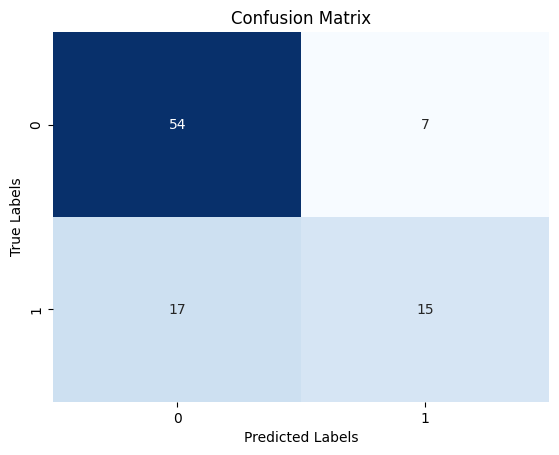

Parameters: {'C': 10, 'solver': 'lbfgs'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


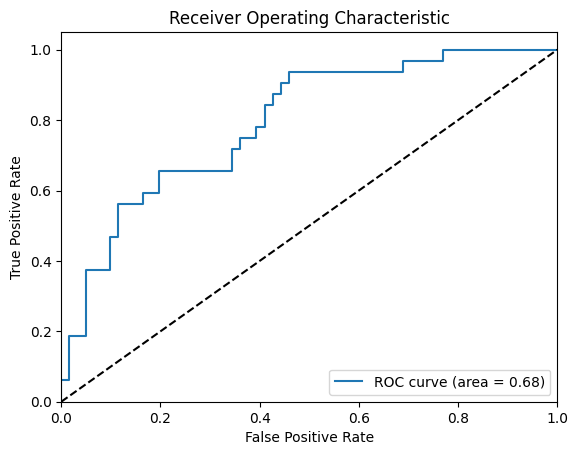

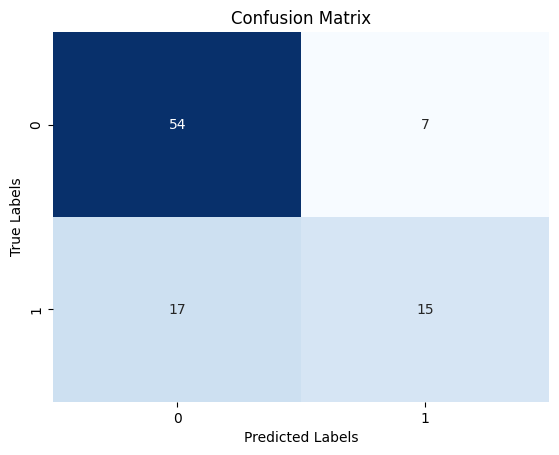

Parameters: {'C': 10, 'solver': 'sag'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


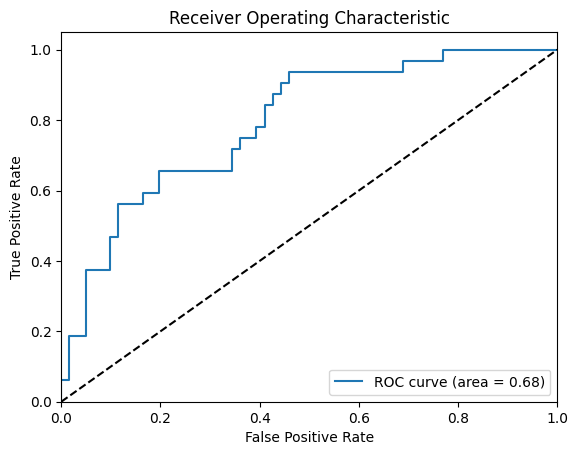

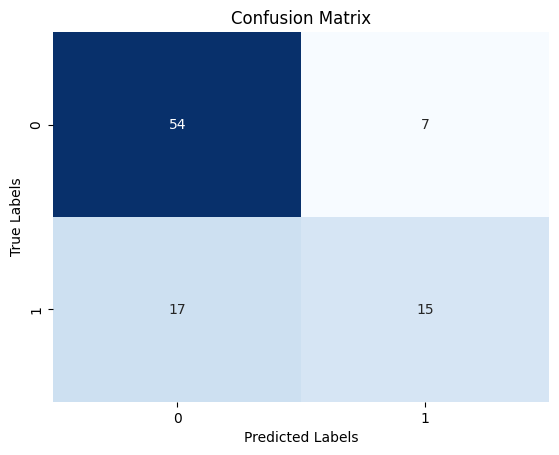

Parameters: {'C': 10, 'solver': 'newton-cg'}
Mean Accuracy: 0.7506849315068493
Accuracy: 0.7419354838709677
Precision: 0.6818181818181818
Recall: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93

ROC AUC Score: 0.6769979508196721
Confusion Matrix:
[[54  7]
 [17 15]]


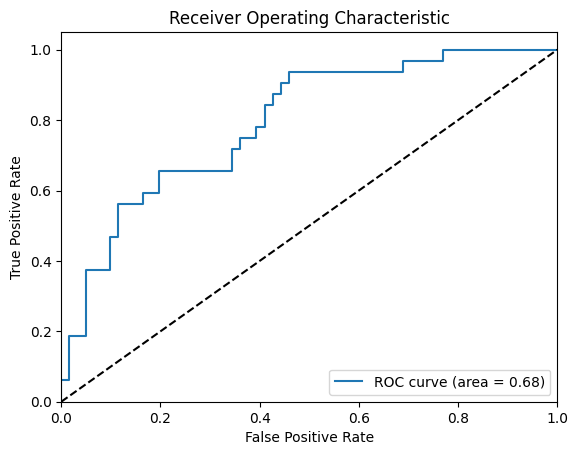

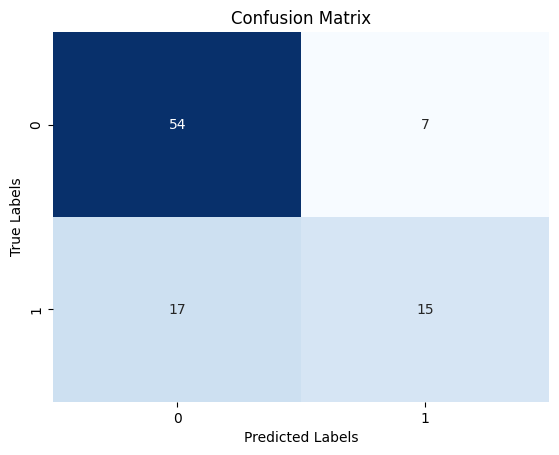

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Accuracy: 0.7506849315068493
Best Model Accuracy: 0.7419354838709677
Best Model Precision: 0.6818181818181818
Best Model Recall: 0.46875
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        61
           1       0.68      0.47      0.56        32

    accuracy                           0.74        93
   macro avg       0.72      0.68      0.69        93
weighted avg       0.73      0.74      0.73        93



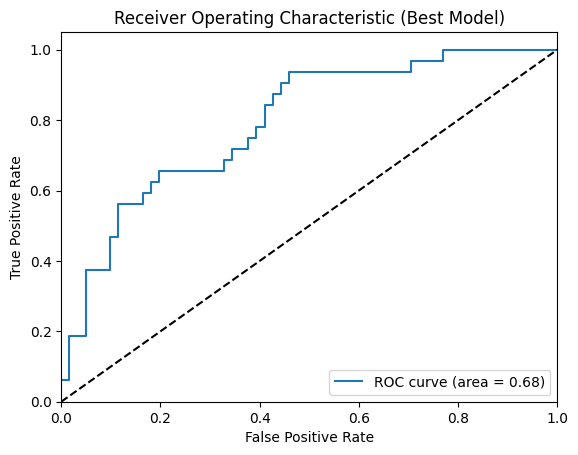

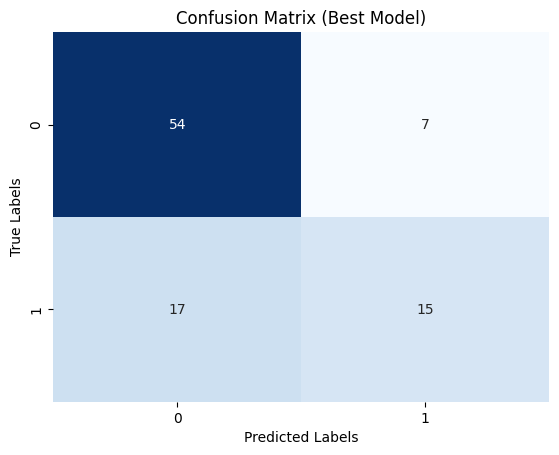

In [2]:
## Logistic Regression
# Standardize features
scaler = StandardScaler()

# Scale the training and testing features usign the same scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']
}

# Initialize GridSearchCV with LogisticRegression estimator
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5, scoring='accuracy')

# Print results of all parameter combinations
results = grid_search.fit(X_train_scaled, y_train).cv_results_
for mean_score, params in zip(results["mean_test_score"], results["params"]):
    print("Parameters:", params)
    print("Mean Accuracy:", mean_score)
    # Train model with current parameters
    current_model = LogisticRegression(**params, max_iter=1000)
    current_model.fit(X_train_scaled, y_train)
    # Predictions
    y_pred = current_model.predict(X_test_scaled)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, current_model.predict_proba(X_test_scaled)[:,1])
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Print metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("=" * 50)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot heatmap for confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Get the best estimator
best_model = grid_search.best_estimator_

# Print best parameters and metrics
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("Best Model Accuracy:", accuracy_score(y_test, best_model.predict(X_test_scaled)))
print("Best Model Precision:", precision_score(y_test, best_model.predict(X_test_scaled)))
print("Best Model Recall:", recall_score(y_test, best_model.predict(X_test_scaled)))
print("Best Model Classification Report:")
print(classification_report(y_test, best_model.predict(X_test_scaled)))

# ROC curve for the best model
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:,1])
roc_auc = roc_auc_score(y_test, best_model.predict(X_test_scaled))

# Plot ROC curve for the best model
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Best Model)')
plt.legend(loc="lower right")
plt.show()

# Confusion matrix for the best model
best_model_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test_scaled))

# Plot heatmap for the best model confusion matrix
plt.figure()
sns.heatmap(best_model_conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix (Best Model)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# K Nearest Neighbors

K Nearest Neighbors
Unscaled Features
K=3
Accuracy for k=3: 0.7311827956989247
Precision for k=3: 0.64
Recall for k=3: 0.5
F1 Score for k=3: 0.5614035087719298
Confusion Matrix for k=3:
[[52  9]
 [16 16]]




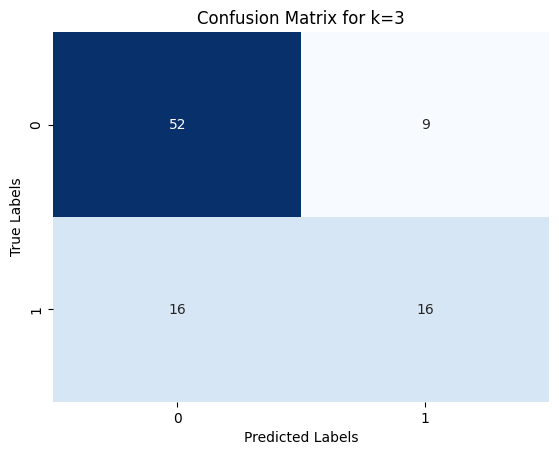

K=5
Accuracy for k=5: 0.7634408602150538
Precision for k=5: 0.7272727272727273
Recall for k=5: 0.5
F1 Score for k=5: 0.5925925925925926
Confusion Matrix for k=5:
[[55  6]
 [16 16]]




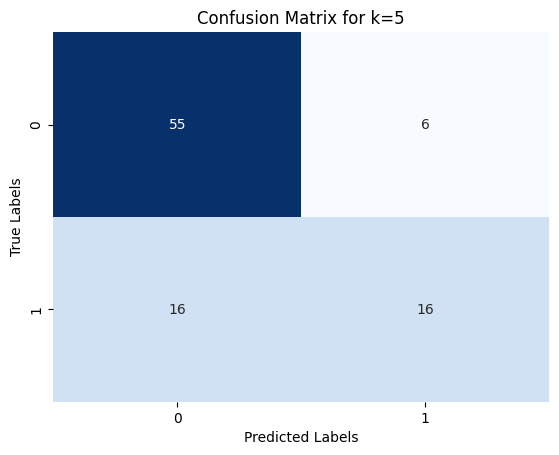

K=7
Accuracy for k=7: 0.7634408602150538
Precision for k=7: 0.7083333333333334
Recall for k=7: 0.53125
F1 Score for k=7: 0.6071428571428571
Confusion Matrix for k=7:
[[54  7]
 [15 17]]




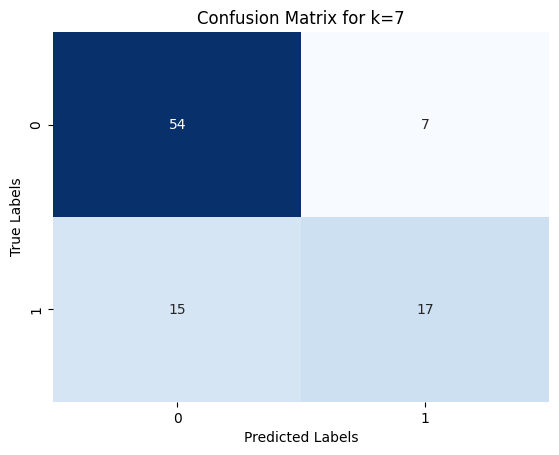

K=9
Accuracy for k=9: 0.7956989247311828
Precision for k=9: 0.76
Recall for k=9: 0.59375
F1 Score for k=9: 0.6666666666666666
Confusion Matrix for k=9:
[[55  6]
 [13 19]]




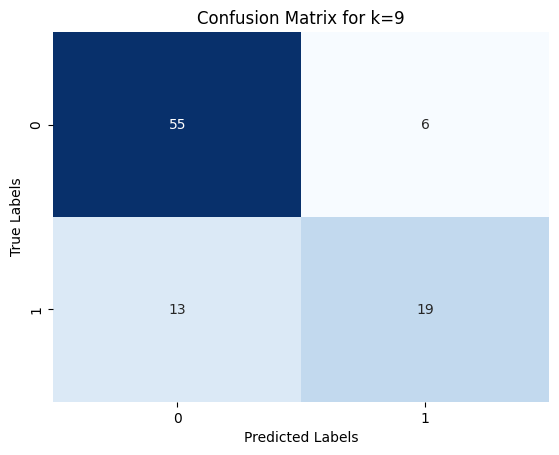

K=11
Accuracy for k=11: 0.7741935483870968
Precision for k=11: 0.7391304347826086
Recall for k=11: 0.53125
F1 Score for k=11: 0.6181818181818182
Confusion Matrix for k=11:
[[55  6]
 [15 17]]




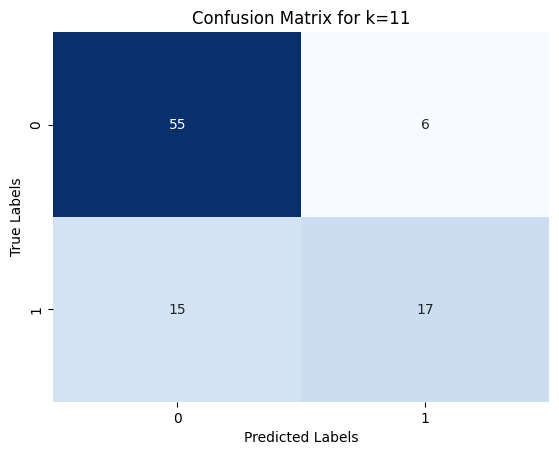

K=13
Accuracy for k=13: 0.8064516129032258
Precision for k=13: 0.7916666666666666
Recall for k=13: 0.59375
F1 Score for k=13: 0.6785714285714286
Confusion Matrix for k=13:
[[56  5]
 [13 19]]




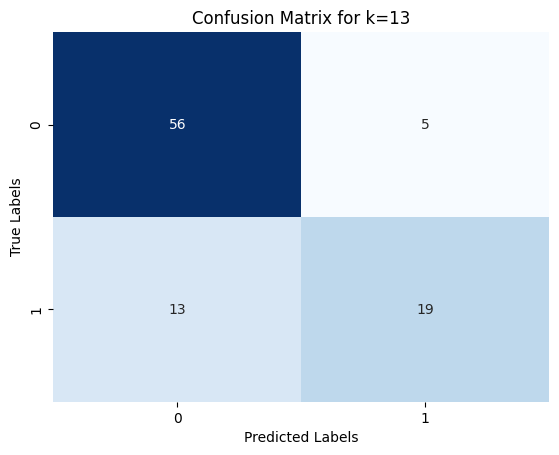

K=15
Accuracy for k=15: 0.8064516129032258
Precision for k=15: 0.7916666666666666
Recall for k=15: 0.59375
F1 Score for k=15: 0.6785714285714286
Confusion Matrix for k=15:
[[56  5]
 [13 19]]




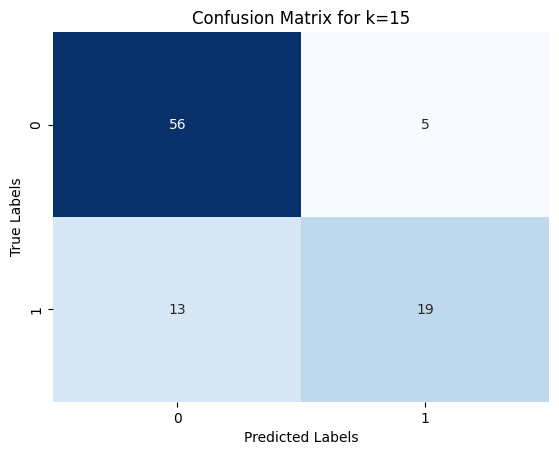

Scaled Features
K=3
Accuracy for k=3: 0.7634408602150538
Precision for k=3: 0.7083333333333334
Recall for k=3: 0.53125
F1 Score for k=3: 0.6071428571428571
Confusion Matrix for k=3:
[[54  7]
 [15 17]]




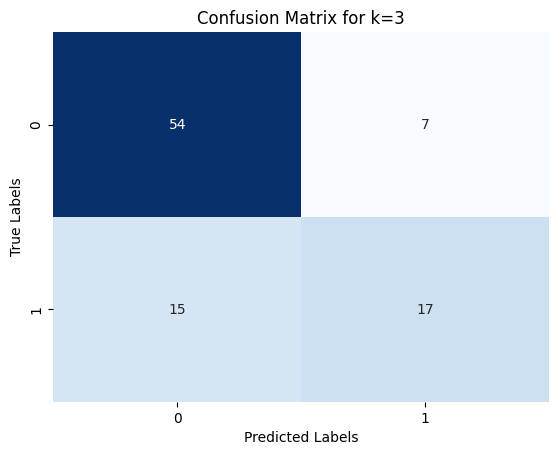

K=5
Accuracy for k=5: 0.7634408602150538
Precision for k=5: 0.7272727272727273
Recall for k=5: 0.5
F1 Score for k=5: 0.5925925925925926
Confusion Matrix for k=5:
[[55  6]
 [16 16]]




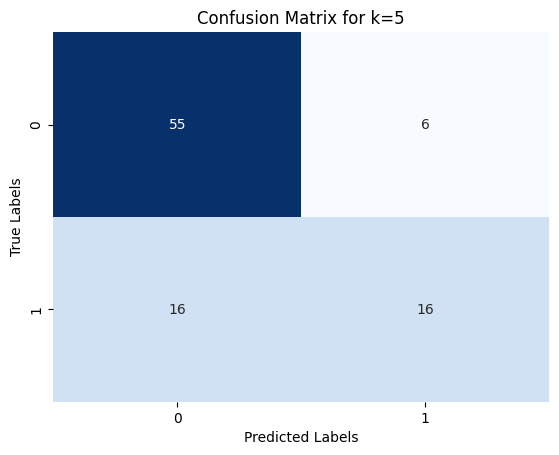

K=7
Accuracy for k=7: 0.6989247311827957
Precision for k=7: 0.5769230769230769
Recall for k=7: 0.46875
F1 Score for k=7: 0.5172413793103449
Confusion Matrix for k=7:
[[50 11]
 [17 15]]




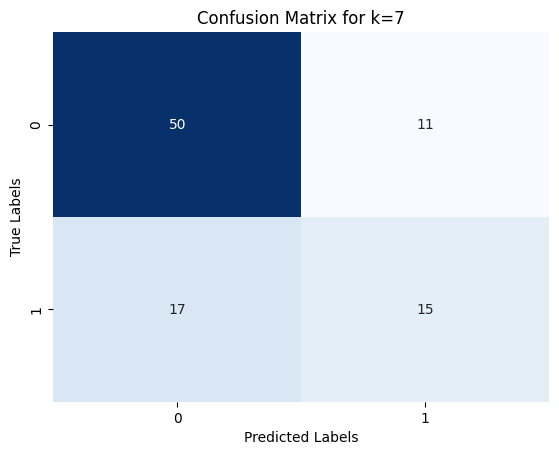

K=9
Accuracy for k=9: 0.7096774193548387
Precision for k=9: 0.5925925925925926
Recall for k=9: 0.5
F1 Score for k=9: 0.5423728813559322
Confusion Matrix for k=9:
[[50 11]
 [16 16]]




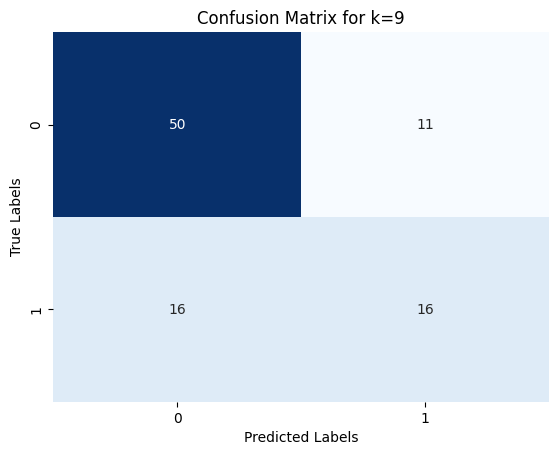

K=11
Accuracy for k=11: 0.7526881720430108
Precision for k=11: 0.6551724137931034
Recall for k=11: 0.59375
F1 Score for k=11: 0.6229508196721311
Confusion Matrix for k=11:
[[51 10]
 [13 19]]




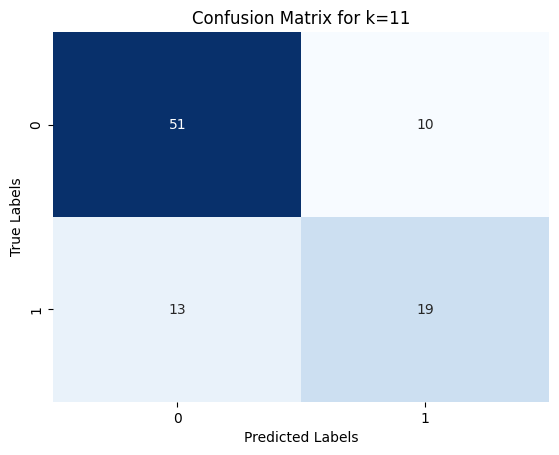

K=13
Accuracy for k=13: 0.6881720430107527
Precision for k=13: 0.5517241379310345
Recall for k=13: 0.5
F1 Score for k=13: 0.5245901639344263
Confusion Matrix for k=13:
[[48 13]
 [16 16]]




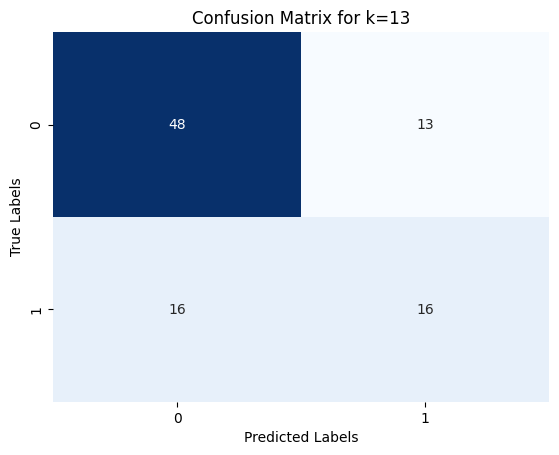

K=15
Accuracy for k=15: 0.6666666666666666
Precision for k=15: 0.5172413793103449
Recall for k=15: 0.46875
F1 Score for k=15: 0.4918032786885246
Confusion Matrix for k=15:
[[47 14]
 [17 15]]




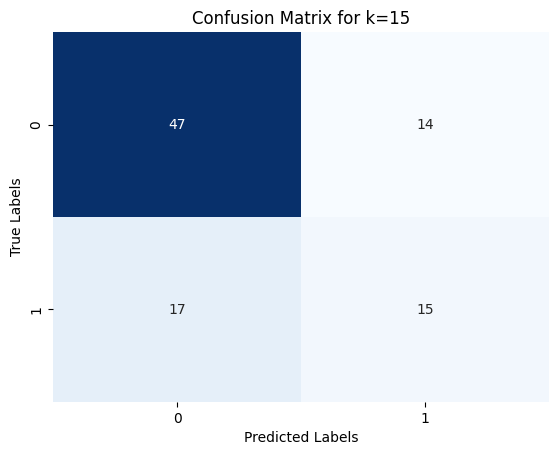

In [3]:
## K Nearest Neighbors
print("=" * 50)
print("K Nearest Neighbors")

k_values = [3, 5, 7, 9, 11, 13, 15]

print("Unscaled Features")

for k in k_values:
    print(f"K={k}")
    knn = KNeighborsClassifier(k)

    # Fit the model to the training set
    knn.fit(X_train, y_train)

    # Predictions
    y_pred = knn.predict(X_test)

    # Calculate metrics
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision for k={k}: {precision}")

    # Recall 
    recall = recall_score(y_test, y_pred)
    print(f"Recall for k={k}: {recall}")

    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score for k={k}: {f1}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for k={k}:")
    print(conf_matrix)
    print("\n")

    # Plot heatmap for confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix for k={k}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

print("Scaled Features")

for k in k_values:
    print(f"K={k}")
    knn = KNeighborsClassifier(k)

    # Fit the model to the training set
    knn.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = knn.predict(X_test_scaled)

    # Calculate metrics
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for k={k}: {accuracy}")

    # Precision
    precision = precision_score(y_test, y_pred)
    print(f"Precision for k={k}: {precision}")

    # Recall 
    recall = recall_score(y_test, y_pred)
    print(f"Recall for k={k}: {recall}")

    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall)
    print(f"F1 Score for k={k}: {f1}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for k={k}:")
    print(conf_matrix)
    print("\n")

    # Plot heatmap for confusion matrix
    plt.figure()
    sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix for k={k}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Neural Networks

=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/
Neural Network
Hidden Layer Size: 5
Learning Rate: 0.01


Epoch 0 Loss: 0.6543102264404297
Epoch 10 Loss: 0.6378181576728821
Epoch 20 Loss: 0.3668891489505768
Epoch 30 Loss: 0.6798133254051208
Epoch 40 Loss: 0.2865143120288849
Epoch 50 Loss: 0.4529496431350708
Epoch 60 Loss: 0.5452057719230652
Epoch 70 Loss: 0.29761046171188354
Epoch 80 Loss: 0.39194583892822266
Epoch 90 Loss: 0.41799497604370117
Accuracy: 0.7311827956989247
Precision: 0.6206896551724138
Recall: 0.5625
F1 Score: 0.5901639344262296
Confusion Matrix:
[[50 11]
 [14 18]]


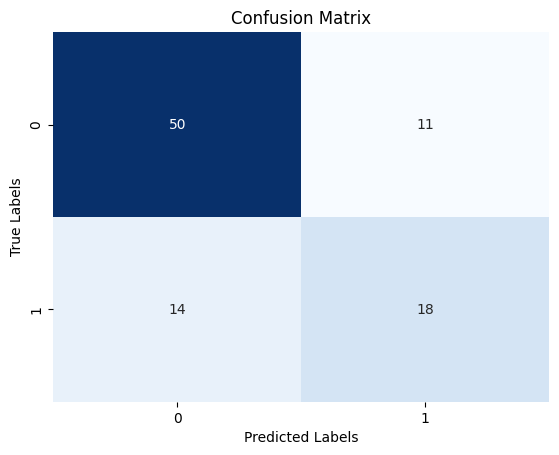

Hidden Layer Size: 5
Learning Rate: 0.1


Epoch 0 Loss: 0.40332379937171936
Epoch 10 Loss: 0.5922891497612
Epoch 20 Loss: 0.42399030923843384
Epoch 30 Loss: 0.728882372379303
Epoch 40 Loss: 0.3940637409687042
Epoch 50 Loss: 0.351094126701355
Epoch 60 Loss: 0.4328005909919739
Epoch 70 Loss: 0.4214830994606018
Epoch 80 Loss: 0.2777268588542938
Epoch 90 Loss: 0.20996840298175812
Accuracy: 0.7204301075268817
Precision: 0.6
Recall: 0.5625
F1 Score: 0.5806451612903225
Confusion Matrix:
[[49 12]
 [14 18]]


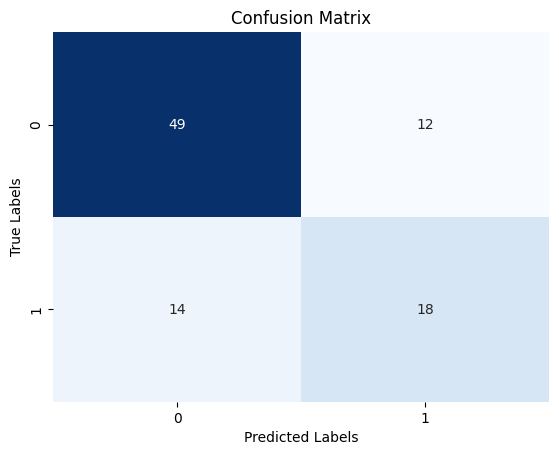

Hidden Layer Size: 5
Learning Rate: 1


Epoch 0 Loss: 1.21591317653656
Epoch 10 Loss: 0.801065981388092
Epoch 20 Loss: 0.5410155653953552
Epoch 30 Loss: 0.41600921750068665
Epoch 40 Loss: 0.6546972393989563
Epoch 50 Loss: 0.43639782071113586
Epoch 60 Loss: 0.587164044380188
Epoch 70 Loss: 0.6047391891479492
Epoch 80 Loss: 1.04805326461792
Epoch 90 Loss: 0.6152336001396179
Accuracy: 0.6559139784946236
Precision: 0.0
Recall: 0.0
F1 Score: nan
Confusion Matrix:
[[61  0]
 [32  0]]


c:\Users\Isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Isaac\AppData\Local\Temp\ipykernel_19428\292457214.py:82: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision * recall) / (precision + recall)


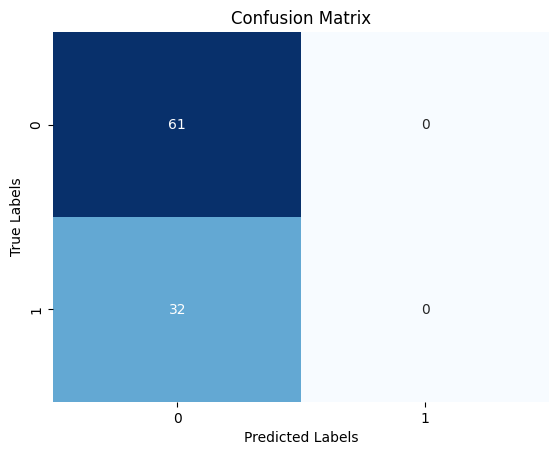

Hidden Layer Size: 5
Learning Rate: 10


Epoch 0 Loss: 70.5882339477539
Epoch 10 Loss: 52.94117736816406
Epoch 20 Loss: 58.82352828979492
Epoch 30 Loss: 58.82352828979492
Epoch 40 Loss: 52.94117736816406
Epoch 50 Loss: 64.70587921142578
Epoch 60 Loss: 64.70587921142578
Epoch 70 Loss: 52.94117736816406
Epoch 80 Loss: 64.70587921142578
Epoch 90 Loss: 64.70587921142578
Accuracy: 0.34408602150537637
Precision: 0.34408602150537637
Recall: 1.0
F1 Score: 0.512
Confusion Matrix:
[[ 0 61]
 [ 0 32]]


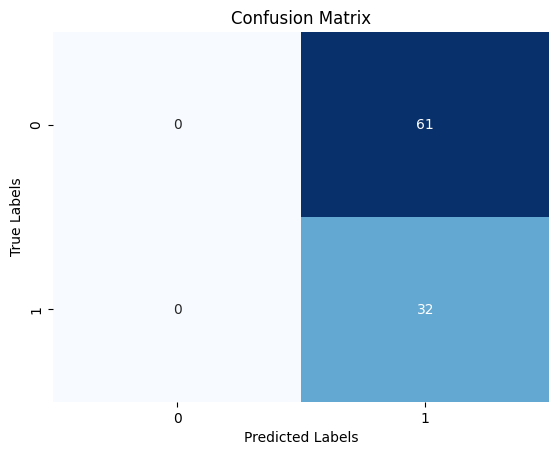

Hidden Layer Size: 10
Learning Rate: 0.01


Epoch 0 Loss: 0.7134825587272644
Epoch 10 Loss: 0.5887965559959412
Epoch 20 Loss: 0.3341428339481354
Epoch 30 Loss: 0.4841642379760742
Epoch 40 Loss: 0.36400124430656433
Epoch 50 Loss: 0.38903313875198364
Epoch 60 Loss: 0.2945263385772705
Epoch 70 Loss: 0.37772634625434875
Epoch 80 Loss: 0.40409865975379944
Epoch 90 Loss: 0.5157425999641418
Accuracy: 0.7419354838709677
Precision: 0.6428571428571429
Recall: 0.5625
F1 Score: 0.6000000000000001
Confusion Matrix:
[[51 10]
 [14 18]]


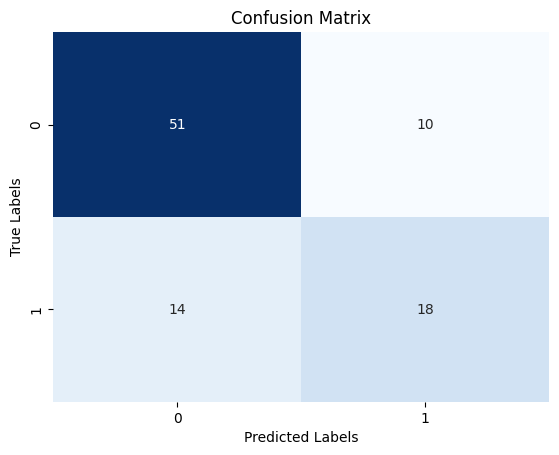

Hidden Layer Size: 10
Learning Rate: 0.1


Epoch 0 Loss: 0.5324330925941467
Epoch 10 Loss: 0.4477579891681671
Epoch 20 Loss: 0.28335335850715637
Epoch 30 Loss: 0.69291752576828
Epoch 40 Loss: 0.3770785629749298
Epoch 50 Loss: 0.40394043922424316
Epoch 60 Loss: 0.37507787346839905
Epoch 70 Loss: 0.3636864423751831
Epoch 80 Loss: 0.30085378885269165
Epoch 90 Loss: 0.2918791174888611
Accuracy: 0.7204301075268817
Precision: 0.6071428571428571
Recall: 0.53125
F1 Score: 0.5666666666666667
Confusion Matrix:
[[50 11]
 [15 17]]


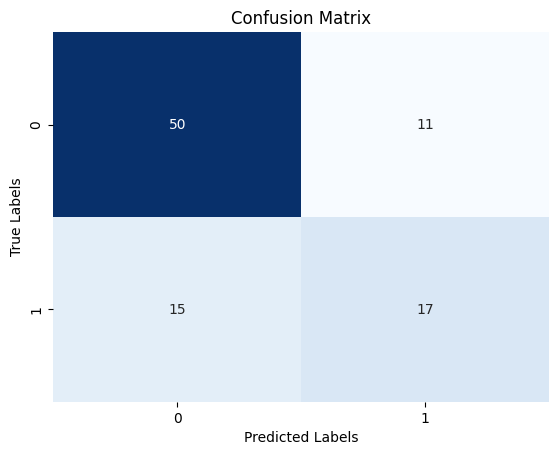

Hidden Layer Size: 10
Learning Rate: 1


Epoch 0 Loss: 0.6230135560035706
Epoch 10 Loss: 0.5149696469306946
Epoch 20 Loss: 0.5801860690116882
Epoch 30 Loss: 0.40838268399238586
Epoch 40 Loss: 0.5182476043701172
Epoch 50 Loss: 0.627589762210846
Epoch 60 Loss: 0.5146980285644531
Epoch 70 Loss: 0.4897747039794922
Epoch 80 Loss: 6.443624496459961
Epoch 90 Loss: 0.3743261992931366
Accuracy: 0.6559139784946236
Precision: 0.0
Recall: 0.0
F1 Score: nan
Confusion Matrix:
[[61  0]
 [32  0]]


c:\Users\Isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Isaac\AppData\Local\Temp\ipykernel_19428\292457214.py:82: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision * recall) / (precision + recall)


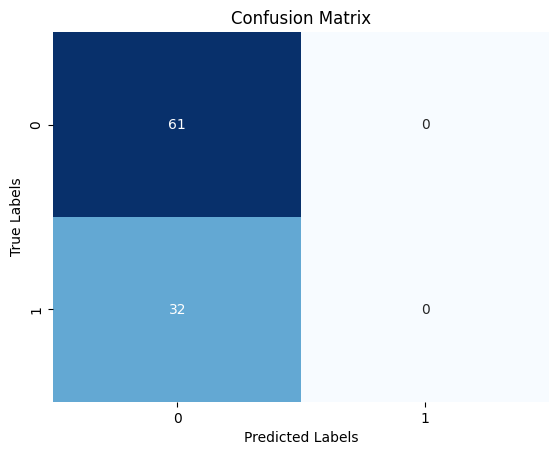

Hidden Layer Size: 10
Learning Rate: 10


Epoch 0 Loss: 47.05882263183594
Epoch 10 Loss: 41.17647171020508
Epoch 20 Loss: 35.29411697387695
Epoch 30 Loss: 47.05882263183594
Epoch 40 Loss: 35.29411697387695
Epoch 50 Loss: 29.41176414489746
Epoch 60 Loss: 29.41176414489746
Epoch 70 Loss: 41.17647171020508
Epoch 80 Loss: 35.29411697387695
Epoch 90 Loss: 35.29411697387695
Accuracy: 0.6559139784946236
Precision: 0.0
Recall: 0.0
F1 Score: nan
Confusion Matrix:
[[61  0]
 [32  0]]


c:\Users\Isaac\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Isaac\AppData\Local\Temp\ipykernel_19428\292457214.py:82: RuntimeWarning: invalid value encountered in scalar divide
  f1 = 2 * (precision * recall) / (precision + recall)


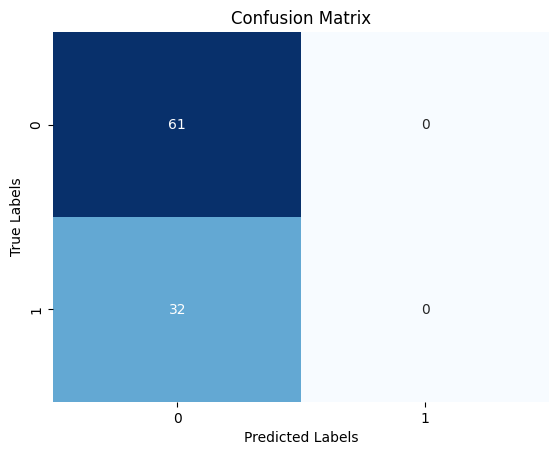

Hidden Layer Size: 15
Learning Rate: 0.01


Epoch 0 Loss: 0.5458672642707825
Epoch 10 Loss: 0.5740352869033813
Epoch 20 Loss: 0.6302907466888428
Epoch 30 Loss: 0.41674792766571045
Epoch 40 Loss: 0.23228459060192108
Epoch 50 Loss: 0.2580544650554657
Epoch 60 Loss: 0.30271056294441223
Epoch 70 Loss: 0.374429851770401
Epoch 80 Loss: 0.3105582594871521
Epoch 90 Loss: 0.4281027019023895
Accuracy: 0.7956989247311828
Precision: 0.696969696969697
Recall: 0.71875
F1 Score: 0.7076923076923077
Confusion Matrix:
[[51 10]
 [ 9 23]]


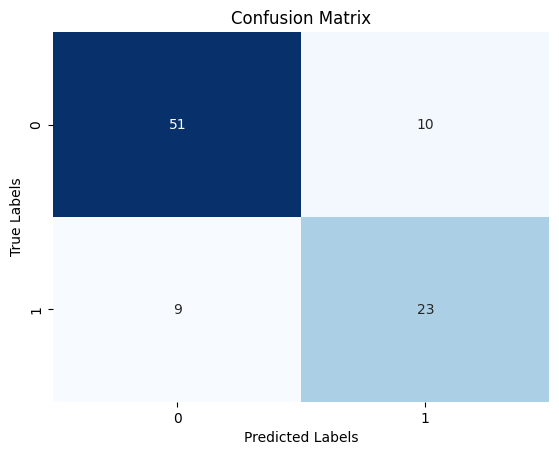

Hidden Layer Size: 15
Learning Rate: 0.1


Epoch 0 Loss: 0.5861013531684875
Epoch 10 Loss: 0.35368549823760986
Epoch 20 Loss: 0.3962775468826294
Epoch 30 Loss: 0.2918708026409149
Epoch 40 Loss: 0.31186965107917786
Epoch 50 Loss: 0.2007352113723755
Epoch 60 Loss: 0.49248623847961426
Epoch 70 Loss: 0.35549232363700867
Epoch 80 Loss: 0.24712501466274261
Epoch 90 Loss: 0.5559482574462891
Accuracy: 0.7204301075268817
Precision: 0.575
Recall: 0.71875
F1 Score: 0.6388888888888888
Confusion Matrix:
[[44 17]
 [ 9 23]]


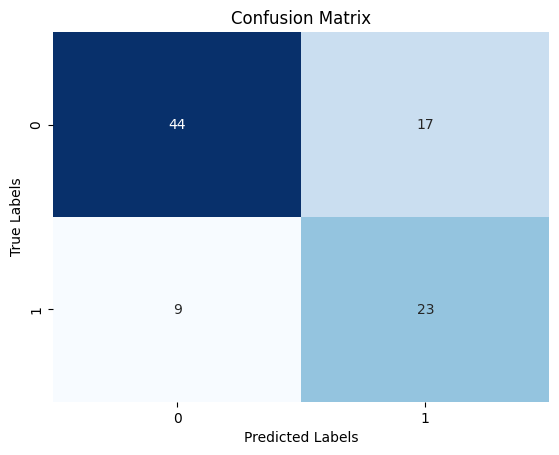

Hidden Layer Size: 15
Learning Rate: 1


Epoch 0 Loss: 8.447138786315918
Epoch 10 Loss: 0.5693833827972412
Epoch 20 Loss: 0.3628590404987335
Epoch 30 Loss: 0.5388405323028564
Epoch 40 Loss: 0.564071774482727
Epoch 50 Loss: 0.7481908202171326
Epoch 60 Loss: 0.5585203170776367
Epoch 70 Loss: 0.6579127907752991
Epoch 80 Loss: 0.6029845476150513
Epoch 90 Loss: 0.5468253493309021
Accuracy: 0.5591397849462365
Precision: 0.4383561643835616
Recall: 1.0
F1 Score: 0.6095238095238095
Confusion Matrix:
[[20 41]
 [ 0 32]]


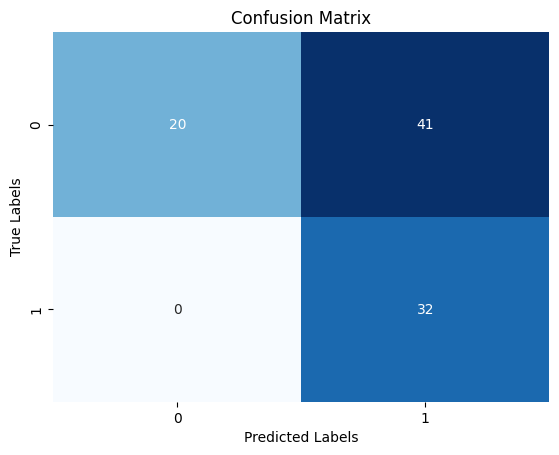

Hidden Layer Size: 15
Learning Rate: 10


Epoch 0 Loss: 29.41176414489746
Epoch 10 Loss: 29.41176414489746
Epoch 20 Loss: 52.94117736816406
Epoch 30 Loss: 17.647058486938477
Epoch 40 Loss: 35.29411697387695
Epoch 50 Loss: 41.17647171020508
Epoch 60 Loss: 41.17647171020508
Epoch 70 Loss: 41.17647171020508
Epoch 80 Loss: 41.17647171020508
Epoch 90 Loss: 52.94117736816406
Accuracy: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.0625
F1 Score: 0.11428571428571428
Confusion Matrix:
[[60  1]
 [30  2]]


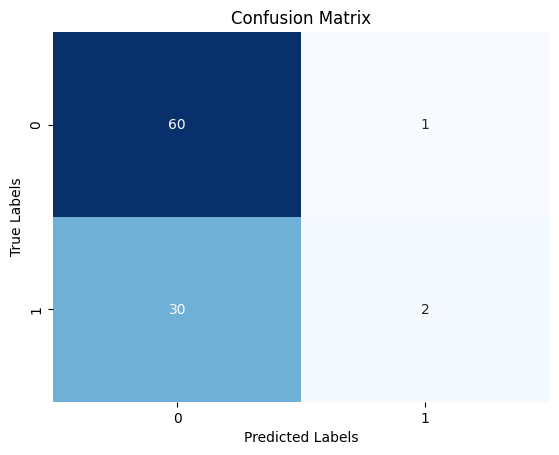

Hidden Layer Size: 20
Learning Rate: 0.01


Epoch 0 Loss: 0.5389708280563354
Epoch 10 Loss: 0.3284100294113159
Epoch 20 Loss: 0.24485044181346893
Epoch 30 Loss: 0.284684956073761
Epoch 40 Loss: 0.3223608136177063
Epoch 50 Loss: 0.2348375916481018
Epoch 60 Loss: 0.43423327803611755
Epoch 70 Loss: 0.21731305122375488
Epoch 80 Loss: 0.32124266028404236
Epoch 90 Loss: 0.251616895198822
Accuracy: 0.7204301075268817
Precision: 0.59375
Recall: 0.59375
F1 Score: 0.59375
Confusion Matrix:
[[48 13]
 [13 19]]


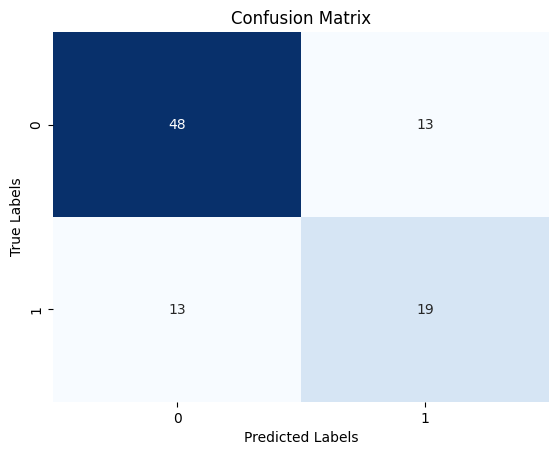

Hidden Layer Size: 20
Learning Rate: 0.1


Epoch 0 Loss: 0.4814225435256958
Epoch 10 Loss: 0.18457123637199402
Epoch 20 Loss: 0.34586015343666077
Epoch 30 Loss: 0.2447715401649475
Epoch 40 Loss: 0.2345047891139984
Epoch 50 Loss: 0.22215652465820312
Epoch 60 Loss: 0.1645040214061737
Epoch 70 Loss: 0.174017071723938
Epoch 80 Loss: 0.13570132851600647
Epoch 90 Loss: 0.2288685292005539
Accuracy: 0.7741935483870968
Precision: 0.6896551724137931
Recall: 0.625
F1 Score: 0.6557377049180328
Confusion Matrix:
[[52  9]
 [12 20]]


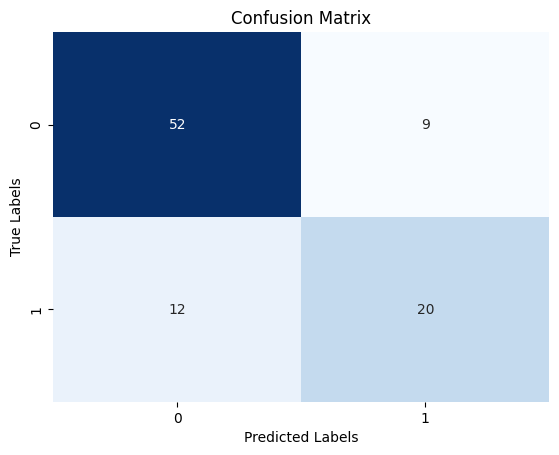

Hidden Layer Size: 20
Learning Rate: 1


Epoch 0 Loss: 48.169189453125
Epoch 10 Loss: 0.6180129647254944
Epoch 20 Loss: 11.993805885314941
Epoch 30 Loss: 0.35030004382133484
Epoch 40 Loss: 3.2625186443328857
Epoch 50 Loss: 6.24515962600708
Epoch 60 Loss: 0.326440691947937
Epoch 70 Loss: 9.036876678466797
Epoch 80 Loss: 6.071791172027588
Epoch 90 Loss: 0.2832253575325012
Accuracy: 0.7096774193548387
Precision: 0.5531914893617021
Recall: 0.8125
F1 Score: 0.6582278481012658
Confusion Matrix:
[[40 21]
 [ 6 26]]


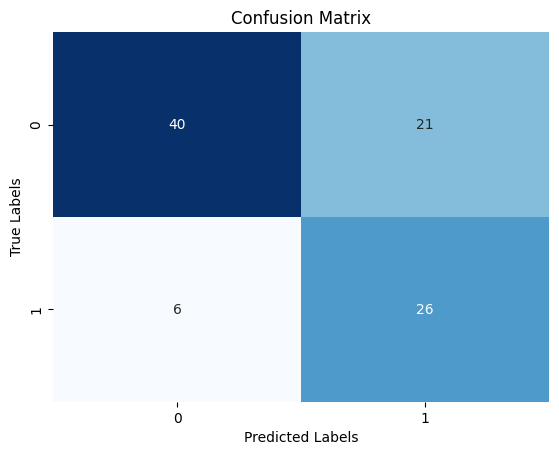

Hidden Layer Size: 20
Learning Rate: 10


Epoch 0 Loss: 35.29411697387695
Epoch 10 Loss: 23.52941131591797
Epoch 20 Loss: 29.41176414489746
Epoch 30 Loss: 41.17647171020508
Epoch 40 Loss: 17.647058486938477
Epoch 50 Loss: 52.94117736816406
Epoch 60 Loss: 29.41176414489746
Epoch 70 Loss: 35.29411697387695
Epoch 80 Loss: 41.17647171020508
Epoch 90 Loss: 41.17647171020508
Accuracy: 0.7096774193548387
Precision: 0.5609756097560976
Recall: 0.71875
F1 Score: 0.6301369863013699
Confusion Matrix:
[[43 18]
 [ 9 23]]


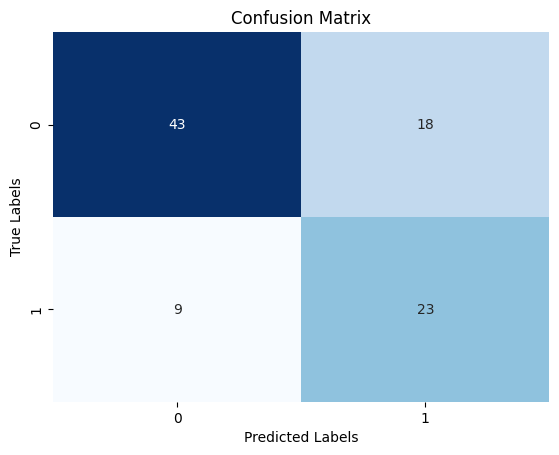

In [4]:
## Neural Network
print("=/" * 50)
print("Neural Network")

# neural network with torch running on the gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Create a Dataset from the tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create a DataLoader from the dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network model
class Net(nn.Module):
    def __init__(self, hidden_layer_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], hidden_layer_size)
        self.fc2 = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x
    
# Define a loss function
criterion = nn.BCELoss()

# Define the hyperparameters based on param_grid

layers = [5, 10, 15, 20]
alphas = [0.01, 0.1, 1, 10]

for layer in layers:
    for alpha in alphas:
        print("=" * 50)
        print(f"Hidden Layer Size: {layer}")
        print(f"Learning Rate: {alpha}")
        print("\n")
        model = Net(layer).to(device)
        optimizer = optim.Adam(model.parameters(), lr=alpha)

        # Train the model
        epochs = 100

        for epoch in range(epochs):
            model.train()
            for i, data in enumerate(train_loader):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels.view(-1, 1))
                loss.backward()
                optimizer.step()

            if epoch % 10 == 0:
                print(f"Epoch {epoch} Loss: {loss.item()}")

        # Evaluate the model
        model.eval()
        y_pred = model(X_test_tensor).cpu().detach().numpy()
        y_pred = np.where(y_pred > 0.5, 1, 0)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy}")

        precision = precision_score(y_test, y_pred)
        print(f"Precision: {precision}")

        recall = recall_score(y_test, y_pred)
        print(f"Recall: {recall}")

        # F1 Score
        f1 = 2 * (precision * recall) / (precision + recall)
        print(f"F1 Score: {f1}")

        # Confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        print("Confusion Matrix:")
        print(conf_matrix)

        # Plot heatmap for confusion matrix
        plt.figure()
        sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
        plt.title("Confusion Matrix")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.show()